# Generate networks for simulations

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import random
import seaborn as sn

In [2]:
outdir = '../networks/'
if not os.path.exists(outdir):
    os.makedirs(outdir)

## Complete graph

In [3]:
CG = nx.complete_graph(1000)

In [4]:
nnodes = len(CG.nodes)
nx.write_edgelist(CG, f'./{outdir}/CG_N{nnodes}.edgelist', data=False)

#### random graph

In [8]:
random.seed(42)
ER = nx.erdos_renyi_graph(n=10000, p=0.001) # ~10 links per node

In [9]:
nnodes = len(ER.nodes)
nedges = len(ER.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/ER_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(ER, outfile)

9.9444


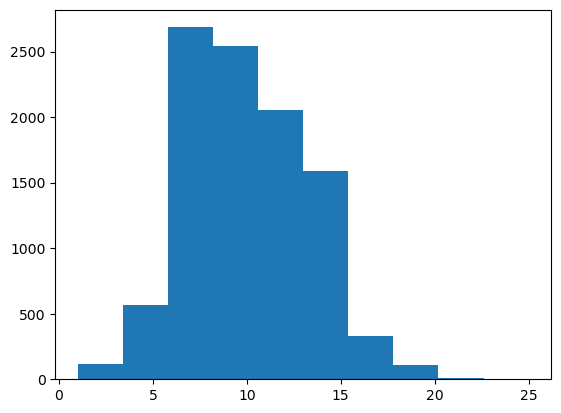

In [10]:
degrees = [j for (i,j) in ER.degree]
print (np.mean(degrees))
plt.hist(degrees)
plt.show()

#### stochastic block model - hierarchical graph

In [11]:
ncom = 9                                   # number of communities
sizes=[round(1111) for i in range(ncom)]   # size of each community
probs = np.zeros((ncom,ncom))              # connection probabilities between nodes of different communities
min_val = 0.0001
for r in range(ncom):
    for c in range(r+1):
        probs[r,c] = max(np.random.normal(0.0000015, 0.0000001), min_val)
        probs[c,r] = probs[r,c]
        if r==c:
            probs[r,c] = max(np.random.normal(0.007, 0.001), min_val)
        elif np.floor(r/3) == np.floor(c/3):
            probs[r,c] = max(np.random.normal(0.0009, 0.0001), min_val)
            probs[c,r] = probs[r,c]

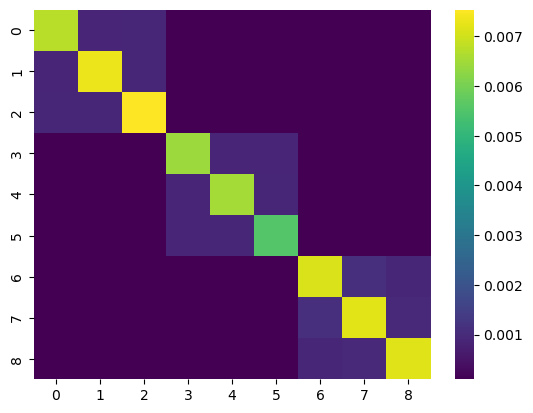

In [12]:
# plot connection probabilities
ax = sn.heatmap(probs, cmap='viridis')
#ax.set_xticklabels([1,3,4,6,7,8,9,11,13])
#plt.colorbar()

In [13]:
# create the SBM graph
random.seed(42)
SBM = nx.stochastic_block_model(sizes=sizes, p=probs)

10.242824282428243


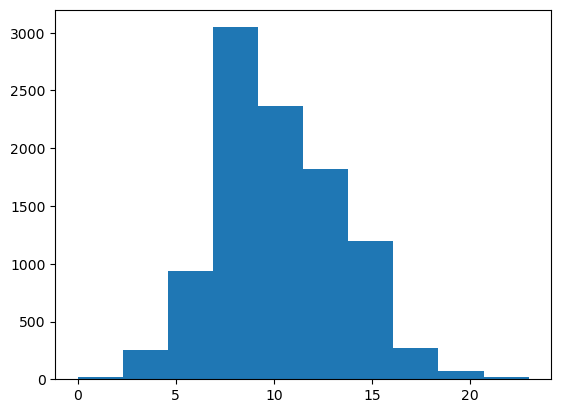

In [14]:
# check the mean degree
degrees = [j for (i,j) in SBM.degree]
print (np.mean(degrees))
plt.hist(degrees)
plt.show()

In [15]:
nnodes = len(SBM.nodes)
nedges = len(SBM.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/SBM_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(SBM, outfile)

#### Other hierarchical models

In [67]:
ncom = 9
n = 10000
tau1 = 4.2
tau2 = 2.
mu = 0.2
average_degree = 10
random.seed(42)
LFR = nx.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree)
LFR.remove_edges_from(nx.selfloop_edges(LFR))

10.0646


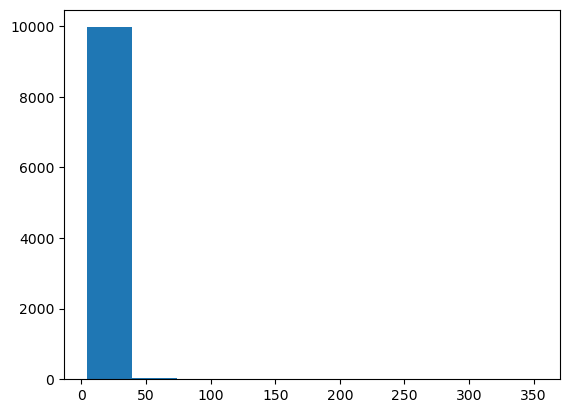

In [68]:
# check the mean degree
degrees = [j for (i,j) in LFR.degree]
print (np.mean(degrees))
plt.hist(degrees)
plt.show()

In [69]:
nnodes = len(LFR.nodes)
nedges = len(LFR.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/LFR_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(LFR, outfile)

#### scale-free graph

In [3]:
random.seed(42)
deg_desired = [max(1, round(np.random.exponential(10))) for i in range(10000)]

In [4]:
if np.sum(deg_desired)%2==1:
    deg_desired[-1] += 1

9.8282


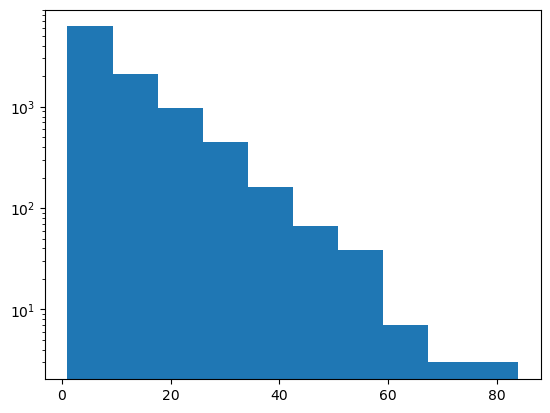

In [5]:
print (np.mean(deg_desired))
plt.hist(deg_desired)
plt.yscale('log')
plt.show()

In [6]:
SF = nx.configuration_model(deg_desired)
SF.remove_edges_from(nx.selfloop_edges(SF))

In [7]:
nnodes = len(SF.nodes)
nedges = len(SF.edges)
av_degree = 2*nedges/nnodes
outfile = open("./%s/SF_N%d_<k>%d.txt"%(outdir, nnodes, round(av_degree)), 'wb')
nx.write_edgelist(SF, outfile)